<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/09_Improving_Language_Understanding_by_Generative_Pre_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Improving Language Understanding by Generative Pre-Training

## Background

1. Transformer 
    1. RNN Encoder-Decoder (seq2seq) 구조의 단점 
        - 병렬 계산 불가능한 recurrent model
        - Sequence 길어지면 long-term dependency 처리 능력 저하
            -> Attention mechanism 적용하여 해결

    2. Trnsformer
        - recurrence 없애 parallelization 가능하게 함.

2. Attention 
    - RNN Encoder-Decoder 번역 모델의 단점을 보완하기 위해 나옴
    - 중요한 부분에 더 집중을 한다(attention weight)
    - 처음 나왔을 때는 RNN ENC-DEC의 보조 장치

3. Self-Attention
    - Attention mechanism과 비슷함
    - 문장 내 단어들 간의 연관성 포착
    - Long-term dependency 포착 성능 향상
    - Computation complexity 감소 목적

4. Positional Encoding 
    - Non sequential input 
        - RNN처럼 sequential input 아님
        - 위치 정보 따로 줘야함
    


5. Byte Pair Encoding 
    - OOV 문제 해결하기 위해 제안됨
    - 단어를 의미 가지는 더 작은 subword 단위로 쪼개 encoding (Subword segmentation)
    - 연속으로 가장 많이 등장한 글자 쌍 병합 반복하며 수행 

6. Pre-training + Fine-tuning
    - 사전학습 후 task에 맞춰 재 학습
    - Pre-train시 큰 unlabeled dataset으로 학습 후 fine-tuning시 적은 양의 labeled dataset으로 재 학습 
        - Labeled dataset 비교적 적게 요구함 

## Abstract

다양한 라벨링되지 않은 데이터로 pre-training을 시킨 후 특정 task에 맞춘 fine-tuning 과정을 거치는 단계를 가진다. 

이전의 방법론들과는 달리 모델구조를 최소한으로 변화시키고 효과적인 Transfer를 얻기 위한 fine-tuning 단계에서 과제에 맞는 Input representations을 사용하였다. 

다양한 실험 결과를 통해 이 접근이 다양한 과제에 대해 효과적임을 증명하였다.

이 논문에서 task에 대한 사전 지식이 없는(task-agnostic) 모델은 특정과제에 특화된 모델 성능을 뛰어넘는다. 

테스트된 12개의 tasks 중 9개에서 SOTA 수준의 성능을 달성하였다. 

## Introduction 

라벨링 되지 않은 raw 데이터의 텍스트에서 효과적으로 학습하는 능력은 NLP에서 supervised learning에 대한 dependency을 낮추는 데 있어 매우 중요한 부분이다.

대부분의 딥러닝 방법은 라벨링된 방대한 양의 데이터를 필요로 하여 학습하는데 이는 많은 자원이 필요하기 때문에 응용에 제한이 두게 된다. 

이러한 상황에서 라벨링되지 않은 데이터로부터 정보를 얻어낼 수 있는 모델은 자원을 들여 라벨링된 데이터를 만드는 것의 훌륭한 대안책이 되고, 

오히려 supervised learning에서보다 더 좋은 결과를 얻기도 한다. 사전학습된 word embedding이 그러한 예시 중 하나이다.

그러나, 라벨링되지 않은 텍스트 데이터에서 단어 수준 정보 이상을 얻는 것은 두가지의 한계점을 가진다.

1. 어떤 objective function이 transfer에 유용한 text representation을 배우는 과정에서 효과적인지 명확하지 않다. 최근 연구들에서 다양한 objective function을 사용함으로써 더 나은 성능을 보여준 예시가 있기 때문이다.

2. 학습된 representation을 다른 task로 transfer하는 가장 효과적인 방법에 대한 명확한 의견이 없다. 대부분의 기존 방법들은 모델에 task-specific한 변화가 필요하다.

이러한 한계점들로 인해 NLP에 대한 효과적인 semi-supervised learning의 개발은 어려움이 있다.


이 논문에서는 unsupervised pre-training과 supervised fine-tuning을 사용하여 언어이해 과제를 위한 semi-supervised 접근법을 연구하였다. 

약간의 fine-tuning으로 다양한 과제에 전이를 통해 사용이 가능한 범용적인 representation을 학습하는 것이다. 

라벨링되지 않은 대량의 말뭉치와 라벨링된 데이터를 갖는 여러 dataset를 가정한다. 

## Training

학습은 다음의 두 단계를 거친다. 

1. 모델의 초기 parameter를 학습하기 위해 라벨링되지 않은 데이터에 대한 objective function를 사용한다. 학습된 parameter를 supervised objective function을 사용하여 목표 task에 적용시킨다.

2. 모델에서는 기존 많은 task에서 상당한 성능을 보인 Transformer를 사용한다. transformer는 RNN, LSTM에 비해 장거리 의존성을 다루는 데 뛰어나 더 많은 구조화된 memory를 쓸 수 있게 한다. 
transfer 중에는 traversal-style 접근법에서 얻은 task-specific 입력적응을 이용하며 Input은 하나의 일련의 ‘연속의 token’으로 주어진다. 이 방법은 사전학습된 모델의 구조를 최소한으로 바꾸게 한다.

이 접근법을 네 가지(자연어추론, Q&A, 의미 유사성, 문서분류)과제에 대해 평가한다. 이 모델은 12개 중 9개의 과제에서 SOTA수준의 결과를 보인다.

## Model

In [ ]:
학습은 두 단계로 진행된다.

GPT는 Transformer의 변형인 multi-layer Transformer decoder를 사용함.

1. 라벨링되지 않은 대량 데이터를 이용하여 큰 언어모델을 학습
    - 이 모델은 입력 문맥 token에 multi-headed self-attention을 적용 후, 목표 token에 대한 분포를 얻기 위해 position-wise feedforward layer를 적용

2. 라벨링 데이터를 이용하여 특정 task에 맞춰 모델을 fine-tuning
    - 모델을 학습한 후, parameter를 task에 맞춰 fine-tuning한다
 

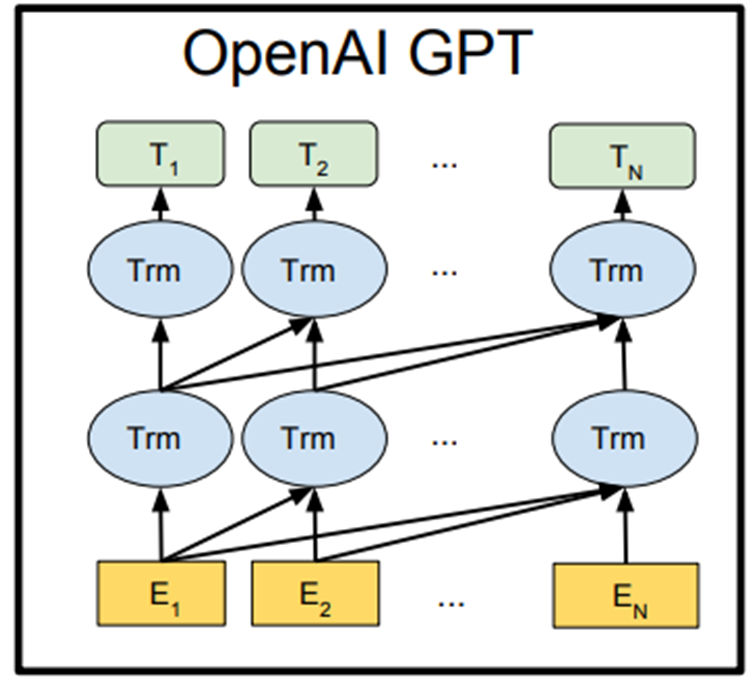

입력 데이터 셋에 따라서 이후 구조에 차이가 있음. 


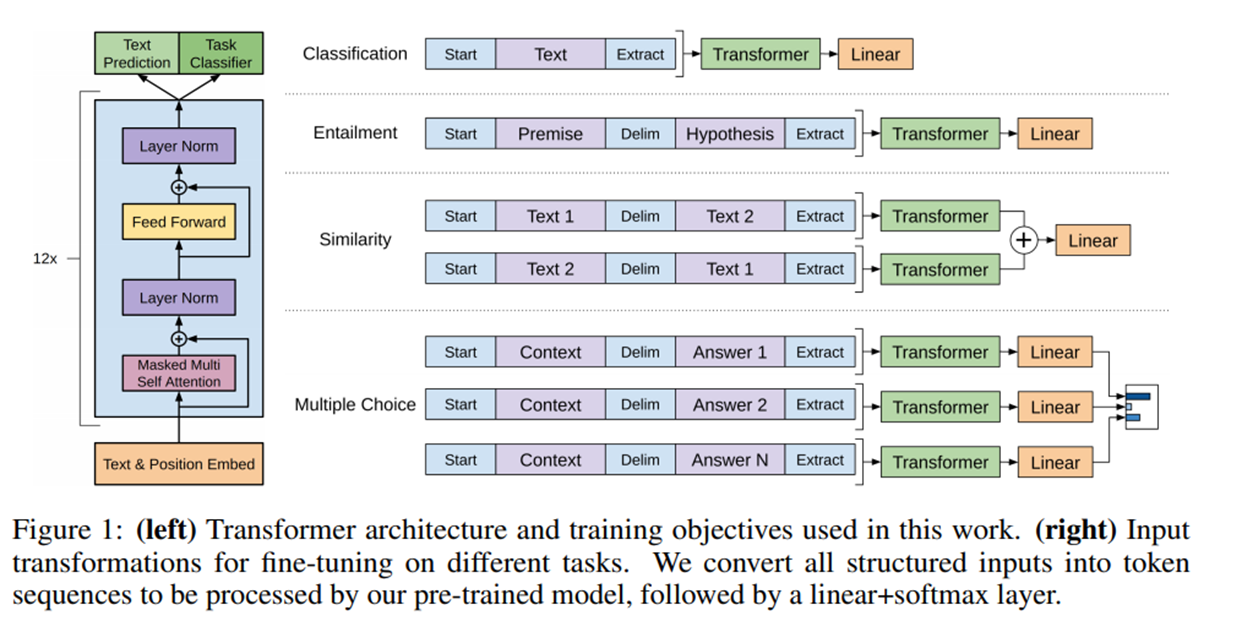

##Experiments 

Latural Language Inference

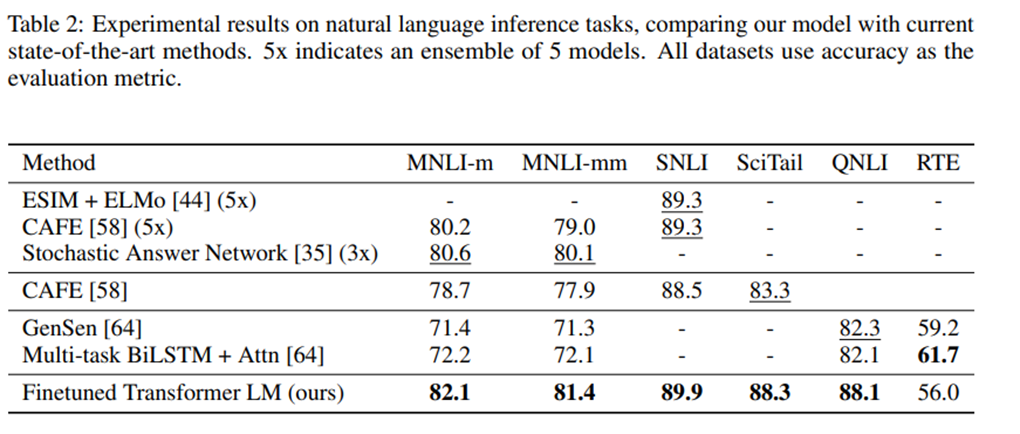

Question Answering & Commonsense Reasoning 


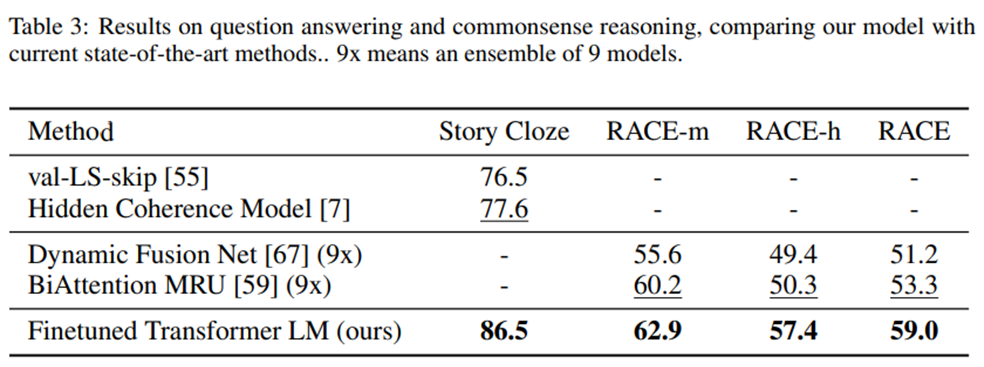

#Conclusion

본 논문은 Generative pre-training 특정 과제에 특화된 fine-tuning을 통해 학습한 task-agnostic model로 여러 NLP task에 뛰어난 성능을 보여준다. 

Question and Answering, Segment Similarity Assessment, Text Entailment, Classification 등의 분야에서 12개의 과제 중 9개 과제에서 SOTA 달성


출처 : https://www.youtube.com/watch?v=7_mv1qvHnEg&t=735s